In [20]:
import pandas as pd
import hypertools as hyp
import seaborn as sns
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected=True)

In [21]:
months = ['apr', 'may', 'jun', 'jul', 'aug', 'sep']
data = []
for m in months:
    next_fname = 'uber-trip-data/uber-raw-data-' + m + '14.csv'
    df = pd.read_csv(next_fname, names=['Time', 'Lat', 'Long', 'Base'], header=0)
    try:
        data.append(df.set_index('Time'))
        print('Loaded ' + next_fname)
    except:
        print('Stuck on: ' + next_fname)
        break
        


Loaded uber-trip-data/uber-raw-data-apr14.csv
Loaded uber-trip-data/uber-raw-data-may14.csv
Loaded uber-trip-data/uber-raw-data-jun14.csv
Loaded uber-trip-data/uber-raw-data-jul14.csv
Loaded uber-trip-data/uber-raw-data-aug14.csv
Loaded uber-trip-data/uber-raw-data-sep14.csv


[                  Lat     Long    Base
Time                                  
4/1/14 0:11   40.7690 -73.9549  B02512
4/1/14 0:17   40.7267 -74.0345  B02512
4/1/14 0:21   40.7316 -73.9873  B02512
4/1/14 0:28   40.7588 -73.9776  B02512
4/1/14 0:33   40.7594 -73.9722  B02512
4/1/14 0:33   40.7383 -74.0403  B02512
4/1/14 0:39   40.7223 -73.9887  B02512
4/1/14 0:45   40.7620 -73.9790  B02512
4/1/14 0:55   40.7524 -73.9960  B02512
4/1/14 1:01   40.7575 -73.9846  B02512
4/1/14 1:19   40.7256 -73.9869  B02512
4/1/14 1:48   40.7591 -73.9684  B02512
4/1/14 1:49   40.7271 -73.9803  B02512
4/1/14 2:11   40.6463 -73.7896  B02512
4/1/14 2:25   40.7564 -73.9167  B02512
4/1/14 2:31   40.7666 -73.9531  B02512
4/1/14 2:43   40.7580 -73.9761  B02512
4/1/14 3:22   40.7238 -73.9821  B02512
4/1/14 3:35   40.7531 -74.0039  B02512
4/1/14 3:35   40.7389 -74.0393  B02512
4/1/14 3:41   40.7619 -73.9715  B02512
4/1/14 4:11   40.7530 -74.0042  B02512
4/1/14 4:15   40.6561 -73.9531  B02512
4/1/14 4:19   40.7250 -7

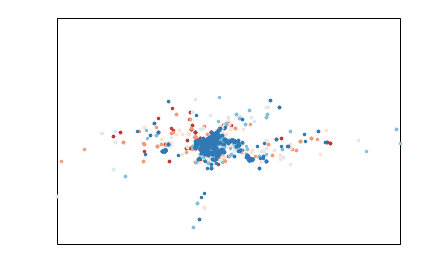

In [26]:
n = 1000
bases = list(map(lambda x: np.array(x.values, ndmin=2).T, list(map(lambda x: x.head(n)['Base'], data))))
x = list(map(lambda x: x.head(n), data))
print (x)
hyp.plot(x, '.', palette='RdBu', ndims=2);

In [23]:
x[0].head()

Lat     Long    Base
Time                                 
4/1/14 0:11  40.7690 -73.9549  B02512
4/1/14 0:17  40.7267 -74.0345  B02512
4/1/14 0:21  40.7316 -73.9873  B02512
4/1/14 0:28  40.7588 -73.9776  B02512
4/1/14 0:33  40.7594 -73.9722  B02512

In [24]:
locations = list(map(lambda x: go.Scattergeo(lat=x['Lat'], lon=x['Long']), x))
print (locations)

[{'type': 'scattergeo', 'lat': Time
4/1/14 0:11     40.7690
4/1/14 0:17     40.7267
4/1/14 0:21     40.7316
4/1/14 0:28     40.7588
4/1/14 0:33     40.7594
4/1/14 0:33     40.7383
4/1/14 0:39     40.7223
4/1/14 0:45     40.7620
4/1/14 0:55     40.7524
4/1/14 1:01     40.7575
4/1/14 1:19     40.7256
4/1/14 1:48     40.7591
4/1/14 1:49     40.7271
4/1/14 2:11     40.6463
4/1/14 2:25     40.7564
4/1/14 2:31     40.7666
4/1/14 2:43     40.7580
4/1/14 3:22     40.7238
4/1/14 3:35     40.7531
4/1/14 3:35     40.7389
4/1/14 3:41     40.7619
4/1/14 4:11     40.7530
4/1/14 4:15     40.6561
4/1/14 4:19     40.7250
4/1/14 4:20     40.6950
4/1/14 4:26     40.9859
4/1/14 4:27     40.6879
4/1/14 4:38     40.6878
4/1/14 4:47     40.7234
4/1/14 4:49     40.7336
                 ...   
4/1/14 22:08    40.7404
4/1/14 22:09    40.7619
4/1/14 22:11    40.6990
4/1/14 22:12    40.7368
4/1/14 22:13    40.7460
4/1/14 22:14    40.7058
4/1/14 22:16    40.7590
4/1/14 22:17    40.7386
4/1/14 22:17    40.7627
4/1/

In [25]:
layout = dict(title='Uber rides',              
             geo=dict(scope='usa',
                 projection=dict(type='albers usa'),
                 showland=True,
                 landcolor = 'rgb(243, 243, 243)',
                 countrycolor = 'rgb(204, 204, 204)'))
fig = dict(data=locations, layout=layout)
iplot(fig)